In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/charge_surface/py_files')
from flatQuenchedBrush import flatQuenchedBrush
from create_in import create_in
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
N = 100
# S = 150

S_namics = 100

alpha = 0.5

chi = 0.5
chi_surf = -0.3

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.315377e+00 |g| = 6.222517e+00 alpha = 1.000000e+00 
hessian scaling: 1.36115
it =  1  E = 2.075737e+00 |g| = 5.501232e+00 alpha = 1.160707e-01 
it =  2  E = 2.537748e+00 |g| = 6.257406e+00 alpha = 8.305447e-02 
it =  3  E = 8.802951e+00 |g| = 6.801195e+00 alpha = 8.062682e-03 
it =  4  E = 8.495564e+00 |g| = 6.481663e+00 alpha = 8.526607e-03 
it =  5  E = 6.433370e+00 |g| = 6.497766e+00 alpha = 1.426931e-02 
it =  6  E = 7.244819e+00 |g| = 6.516441e+00 alpha = 1.053155e-02 
it =  7  E = 7.560617e+00 |g| = 6.251305e+00 alpha = 8.634895e-03 
it =  8  E = 1.199635e+01 |g| = 6.168118e+00 alpha = 3.666483e-03 
it =  9  E = 7.713081e+00 |g| = 6.104459e+00 alpha = 8.115478e-03 
it =  10  E = 9.777282e+00 |g| = 6.051924e+00

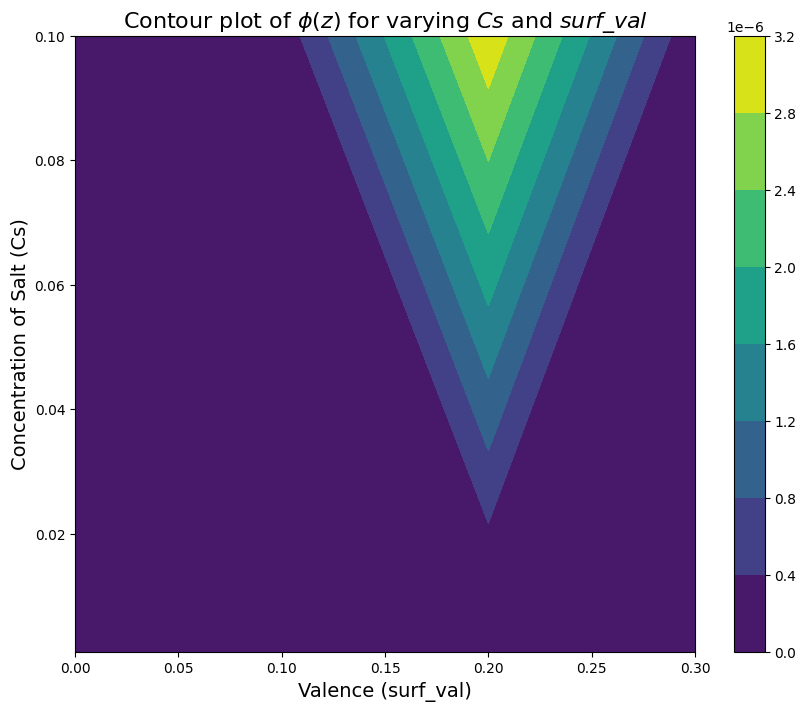

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
Cs_values = [0.001, 0.01, 0.1]  # Концентрация соли
surf_val_values = [0, 0.1, 0.2, 0.3]  # Значения валентности

# Матрицы для хранения значений
X = []  # Валентность (surf_val)
Y = []  # Концентрация соли (Cs)
Z = []  # Профили объемной доли полимера phi(z)

# Пройдем по всем значениям концентрации соли и валентности
for Cs in Cs_values:
    for surf_val in surf_val_values:
        # Рассчитать S для аналитической теории
        S = 100
        
        # Создать SCF файл
        file_name_pro = create_in(
            template_surf_charge='/home/tpopova/prj/PB_SCF/charge_surface/scf_templates/flat_brush_surf.in',
            range_param='Cs',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf=chi_surf,
            N_layers=N,
            N=N,
            S=S_namics,
            alpha=alpha,
            surf_val=surf_val
        )
        
        # Получить результаты расчёта
        H_q, z_in_range_q, z_out_range_q, c_p, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = flatQuenchedBrush(
            N=N,
            S=S,
            alpha=alpha,
            Cs=Cs,
            file_names=file_name_pro
        )
        
        # Сохранение значений для графика
        for i, phi in enumerate(parse_SCF_phi_quen):
            X.append(surf_val)  # Валентность
            Y.append(Cs)  # Концентрация соли
            Z.append(phi)  # Профиль phi(z)

# Преобразование данных в формат numpy массивов для удобства
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

# Определяем диапазоны для осей X и Y
unique_surf_vals = np.unique(X)
unique_Cs_vals = np.unique(Y)

# Сетку для контурного графика создаем по оси X (валентность) и Y (Cs)
# Размерность Z_grid: (количество значений Cs) x (количество значений surf_val) x (размер профиля phi(z))
Z_grid = np.zeros((len(unique_Cs_vals), len(unique_surf_vals), len(parse_SCF_phi_quen)))

# Заполняем Z_grid значениями
for i, Cs in enumerate(unique_Cs_vals):
    for j, surf_val in enumerate(unique_surf_vals):
        # Индекс в массиве X, Y и Z
        mask = (X == surf_val) & (Y == Cs)
        Z_grid[i, j, :] = Z[mask]

# Построение контурного графика
plt.figure(figsize=(10, 8))

# Мы будем рисовать контуры, где X и Y соответствуют валентности и концентрации соли,
# а Z будет отображать профиль потенциала.
cp = plt.contourf(unique_surf_vals, unique_Cs_vals, Z_grid[:, :, 0], cmap='viridis')

# Добавление цветовой шкалы
plt.colorbar(cp)

# Настройка графика
plt.xlabel('Valence (surf_val)', fontsize=14)
plt.ylabel('Concentration of Salt (Cs)', fontsize=14)
plt.title(r'Contour plot of $\phi(z)$ for varying $Cs$ and $surf\_val$', fontsize=16)

plt.show()
